In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

# Load the uploaded file into a DataFrame
data = pd.read_csv('Unemployment in India.csv')


In [ ]:
# Display the first few rows of the dataset
data.head()

# Check for basic information about the dataset
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
# Option 1: Drop rows with missing values
data.dropna(inplace=True)

# Option 2: Fill missing values separately for numeric and non-numeric columns
# Fill numeric columns with the mean
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill non-numeric columns with the mode (most frequent value) or a placeholder
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)  # fill with most frequent value


<ipython-input-8-04a619ee48f3>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)  # fill with most frequent value


In [ ]:
import pandas as pd

# Load your dataset (update 'your_file.csv' with your actual file name)
data = pd.read_csv('Unemployment in India.csv')

data.columns = data.columns.str.strip()

# Print column names to identify the correct name of the date column
print("Columns in the dataset:", data.columns)

# Replace 'Date' with the actual date column name if it's different
data['Date'] = pd.to_datetime(data['Date'])  # Assuming 'Date' is the correct column name

# Display the first few rows to verify the date conversion
data.head()

Columns in the dataset: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


<ipython-input-36-86c149821219>:12: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])  # Assuming 'Date' is the correct column name


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
#DATA ANALYSIS

In [ ]:
# Display summary statistics for numerical columns
data.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Date
count,740.000000,7.400000e+02,740.000000,740
mean,11.787946,7.204460e+06,42.630122,2019-12-12 18:36:58.378378496
min,0.000000,4.942000e+04,13.330000,2019-05-31 00:00:00
25%,4.657500,1.190404e+06,38.062500,2019-08-31 00:00:00
50%,8.350000,4.744178e+06,41.160000,2019-11-30 00:00:00
75%,15.887500,1.127549e+07,45.505000,2020-03-31 00:00:00
max,76.740000,4.577751e+07,72.570000,2020-06-30 00:00:00
std,10.721298,8.087988e+06,8.111094,NaN


In [ ]:
# For a 'Region' column, for instance
data['Region'].unique()


array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [ ]:
import pandas as pd

# Load the dataset (update the path to where you've uploaded it on Colab)
data = pd.read_csv('Unemployment in India.csv')

# Display the column names
print(data.columns)



Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Unemployment in India.csv')

# Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime format with day-first parsing
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# Extract year from 'Date' column
data['Year'] = data['Date'].dt.year

# Calculate mean unemployment rate per year
# Confirming correct unemployment rate column name
yearly_data = data.groupby('Year')['Estimated Unemployment Rate (%)'].mean()

# Display the result
print(yearly_data)



Year
2019.0     9.399047
2020.0    15.101581
Name: Estimated Unemployment Rate (%), dtype: float64


In [ ]:
#DATA VISUALIZATION


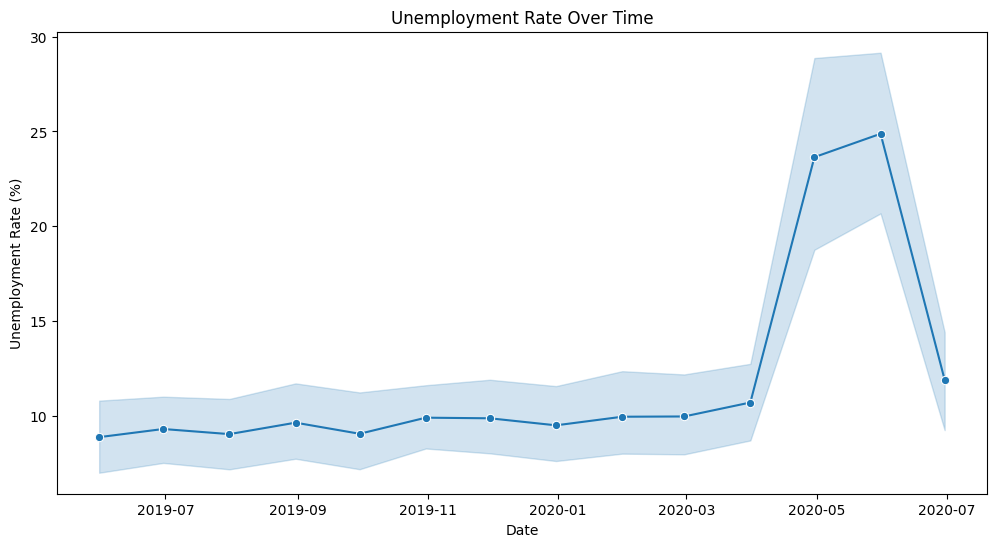

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Unemployment in India.csv')

# Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime format with day-first parsing
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# Assuming your unemployment rate column is named 'Estimated Unemployment Rate (%)'
# You can change it to the actual column name if it's different
plt.figure(figsize=(12, 6))

# Replace 'unemployment_rate' with the correct column name from your DataFrame
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', marker='o')

plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


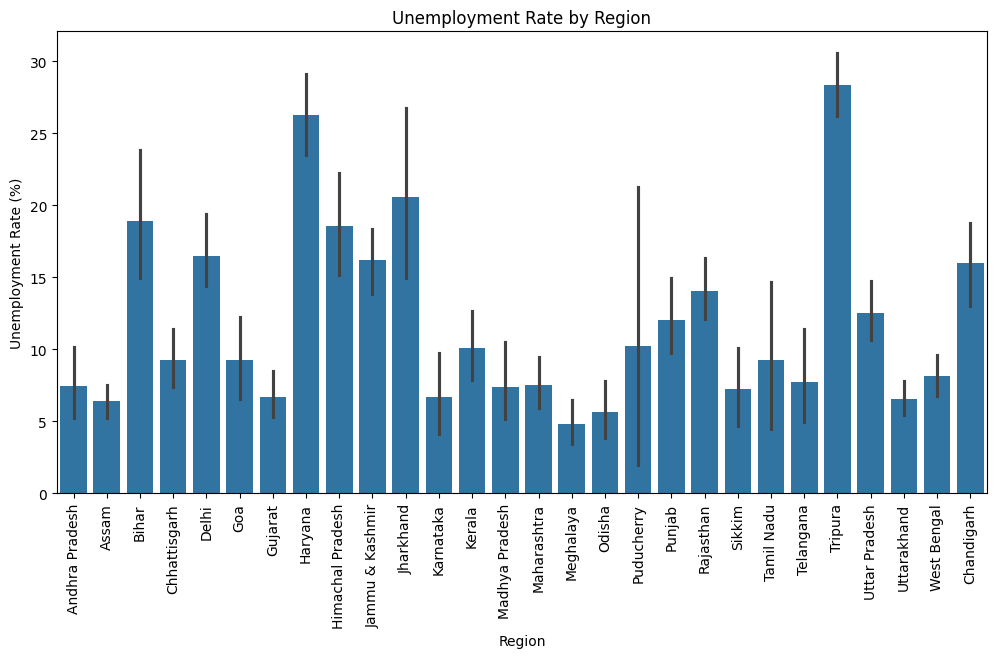

In [ ]:
#Bar Plot for Unemployment Rate by Region
plt.figure(figsize=(12, 6))
# Replace 'unemployment_rate' with the correct column name: 'Estimated Unemployment Rate (%)'
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=data)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()


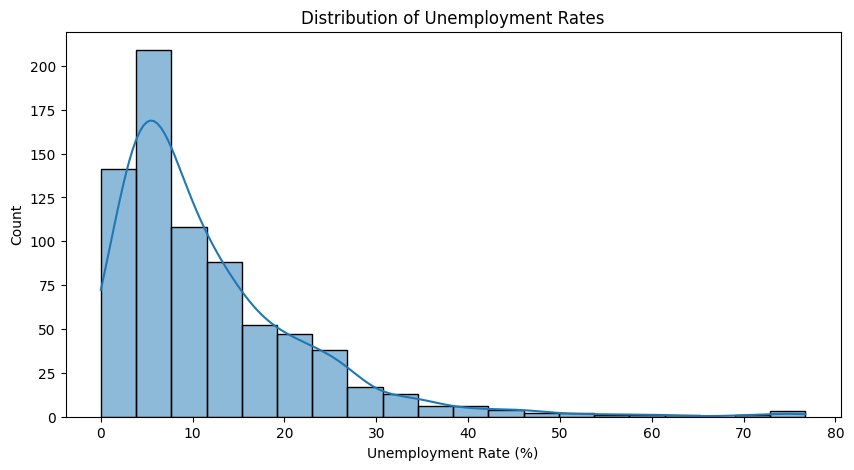

In [ ]:
#Histogram

plt.figure(figsize=(10, 5))
# Replace 'unemployment_rate' with the correct column name: 'Estimated Unemployment Rate (%)'
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.title("Distribution of Unemployment Rates")
plt.xlabel("Unemployment Rate (%)")
plt.show()


Monthly Average Unemployment Rate:

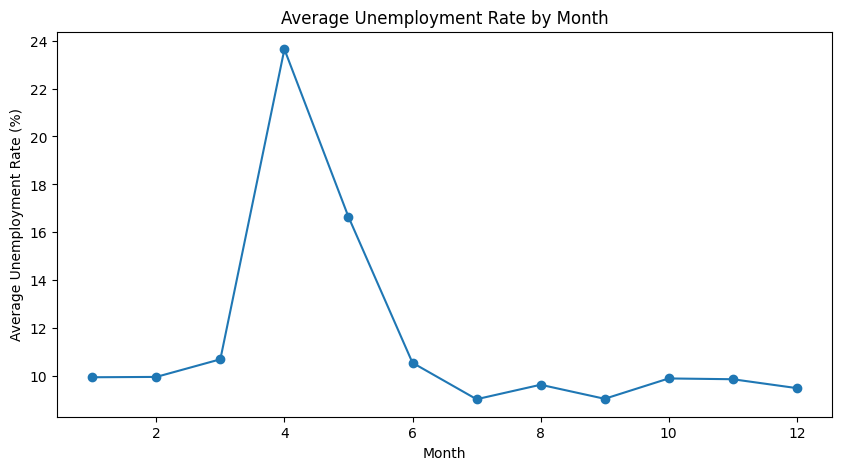

In [ ]:
data['Month'] = data['Date'].dt.month
# Change 'unemployment_rate' to 'Estimated Unemployment Rate (%)'
monthly_avg = data.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
monthly_avg.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.show()

Comparing Pre-COVID and COVID Periods

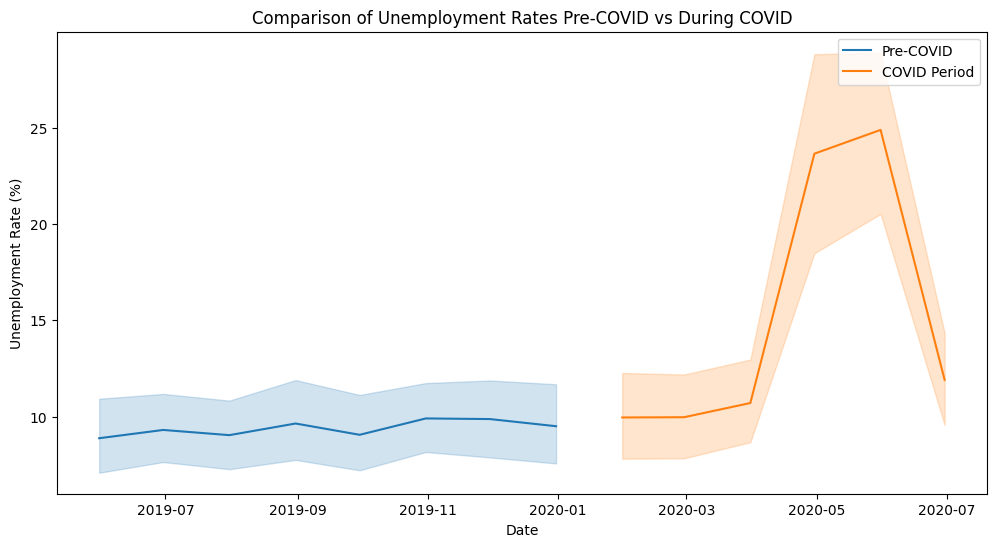

In [ ]:
# Assuming data has columns for Date and 'Estimated Unemployment Rate (%)'
covid_period = data[data['Date'] >= '2020-01-01']
pre_covid_period = data[data['Date'] < '2020-01-01']

# Visualize comparison
plt.figure(figsize=(12, 6))
# Changed 'unemployment_rate' to 'Estimated Unemployment Rate (%)' to match the actual column name
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=pre_covid_period, label='Pre-COVID')
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=covid_period, label='COVID Period')
plt.title("Comparison of Unemployment Rates Pre-COVID vs During COVID")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()
